**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# COGS 108 - EDA Checkpoint

# Names

- Levy Sahoo
- Keenan Serrao
- Leela Stuepfert
- Maya Ammar

# Research Question

-  How do socioeconomic factors influence a nation's performance at the Olympic games?
    - What specific factors are the most signifcant towards a nation's medal performance? 



## Background and Prior Work

The Olympic games have been deemed as notably the most prestigious sporting event in human history, it’s a collective movement where all the best athletes in the world assemble together for one thing in mind: Glory for their nation. The way to achieve this is to attain a medal. Although it’s fair to say that the Olympic games are a stage that gathers the best of the best on the same platform to evaluate their performances in their respective events, we need to reconsider if there’s actually more to what meets the eye test. Instead of simply asking who will find a spot on the podium, seeing the journeys of the athletes with various backgrounds shifts the focus of the question to how did they arrive to the opportunity to compete for a shot at the podium, and are there quantitative features that we can use to assess regarding their country of origin and socioeconomic backgrounds to help us answer the begging question: 

**Do economic factors such as GDP and population count correlate to a nation’s successive medal performance at the Olympic games?** 

**“What do other research studies and deem about factors correlated to a nation’s Olympic Success?”**

A 2000 study<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_ref-1) conducted by economists Andrew Bernard and Meghan Busse, explored how economic factors such as GDP and population size impact a nation’s Olympic success. The resport<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_ref-2) summarized by Michael Klien, Professor of International Economic Affairs at Tufts University, identified real GDP as the most significant predictor of a country's medal count, estimating that a 10% increase in income per capita yields a 6.9% increase in medals, assuming population remains constant. Similarly, a 10% population increase, while holding income steady, leads to a 3.6% rise in medals. These findings suggest a clear correlation between economic scale and Olympic performance, providing a foundation for the relevance of these variables in predicting success. On the contrary, some researchers dispute the validity of these regressors upon a nation’s successive medal performance, a more recent 2022 study<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_ref-3) questions the significance of GDP and population on Olympic outcomes, finding that variables such as GDP size, corruption ranking, athlete count, and topography don’t significantly impact medal standings. Instead, factors like inflation rates, economic activity, and income classification seem to offer alternative perspectives on predicting Olympic success. This work introduces a broader range of variables, which can contribute to refining model regressors and understanding potential limitations of traditional economic measures. Since some of these features aren’t open to public availability, such metrics can deliver insights towards the interpretation of the error terms of the linear regression models used to analyze our objective. A separate Georgia Tech analysis<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_ref-4) identifies other influential factors, such as country size and healthcare expenditure per capita, in determining Olympic performance. By highlighting healthcare investment as a predictor, it expands beyond purely economic indicators, suggesting that a nation’s healthcare infrastructure may play a vital role in supporting elite athletic development.

While each study offers valuable insights, they present varying perspectives on the significance of GDP and population as predictors of Olympic success, it’s not definitive. Researchers may emphasize GDP and population as core predictors, while others cast doubt on their significance, proposing additional variables such as inflation and economic activity. Georgia Tech’s emphasis on healthcare investment introduces yet another dimension. This divergence highlights the complexity of determining Olympic success factors and suggests that GDP and population, though potentially impactful, may not be exhaustive predictors. By integrating these varied viewpoints, our project can better assess the significance of socioeconomic regressors with common data available as well as analyze the combined effect of these and other regressors, using econometric modeling to explore their potential in predicting Olympic medal ranking success while considering possible model limitations and interpreting the error sources.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Bernard, A. (1 Dec 2002) Who Wins the Olympic Games: Economic Resources and Medal Totals *Review of Economics and Statistics*. https://faculty.tuck.dartmouth.edu/images/uploads/faculty/andrew-bernard/olymp60restat_finaljournalversion.pdf 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Klein, M. (17 Jul 2024) What Determines Countries’ Olympic Success? *ECONOFACT* https://econofact.org/what-determines-countries-olympic-success
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Sasha, W. (28 May 2022) Assessment of Olympic performance in relation to economic, demographic, geographic, and social factors: quantile and Tobit approaches *Taylor & Francis Online*. https://www.tandfonline.com/doi/full/10.1080/1331677X.2022.2080735#abstract
3. <a name="cite_note-4"></a> [^](#cite_ref-4) Boudreau, J. The Miracle on Thin Ice: How A Nation's GDP Affects its Olympic Performance *Georgia Tech University*. https://repository.gatech.edu/server/api/core/bitstreams/1aa2b537-c3de-4177-8295-3fcd3a03a965/content#:~:text=We%20estimate%20that%20GDP%20per,bronze%20medals%20a%20country%20receives


# Hypotheses


***Null hypothesis (H<sub>0</sub>):*** There is no significant correlation between a country’s `GDP per capita` or `population` size and its Olympic medal perfomance. 


- Indication that there is no evidence to suggest that ***GDP per capita*** and ***population*** sizes are affiliated the number of medals a country earns and their overall medal performance.


***Alternative hypothesis (H<sub>a</sub>):*** There is a significant correlation between a country’s `GDP per capita` and `population` size upon its Olympic medal performance. 


- There exists evidence that ***higher GDP per capitas*** and ***larger population sizes*** are likely to be correlated with a nation's olympic medal performance, as increased population and resources may correlate to national team size and likelihood of podium success. 



***Predictive Reasoning:*** We believe the answer is lies in the alternative hypothesis, that wealthier and more populus countries experience greater Olympic Success. Due to unobserved variables that allow First-World nations to allocate a greater investment towards athletic development, niche sport specific training, and funding, we can expect these nations to achieve greater success in the Olympics. Additionally, countries with a larger population have a larger population of potential athletes to select from, influencing the size of a nation's olympic team, increasing the likelihood of finding more athletes on the podium. Rejecting the Null hypothesis will allow us to accept the alternative and help us verify whether socioeconomic and demographic advantages contribute to Olympic success or not. 




## Overview of Data(sets)


#### **Dataset #1: Summer Olympic Medals 1896 - 2020**
  - Source: https://www.kaggle.com/datasets/ramontanoeiro/summer-olympic-medals-1986-2020 
  - Number of observations: 1344
  - Number of variables: 8 

"Summer Olympic Medals 1896–2020," is a comprehensive historical record of medals awarded in every Summer Olympic Games from 1896 to 2020, also sourced from Kaggle. Each row provides data on a specific country’s performance in a given Olympic year.

Dataset **columns** include:

- `Year`
- `Host_country`
- `Host_city`
- `Country_Name`
- `Country_Code`
- `Gold`
- `Silver`
- `Bronze`

This dataset contains thousands of observations spanning numerous Olympic editions, enabling us to analyze trends in Olympic performance over time. While this dataset does not include economic indicators, it will serve as a foundation for historical analysis of country specific medal achievements, which can later be compared with economic data for a more in depth exploration of trends.

#### **Dataset #2: GDP by Country 1999 - 2022**

  - Source: https://www.kaggle.com/datasets/alejopaullier/-gdp-by-country-1999-2022
  - Number of observations: 180
  - Number of variables: 24

"GDP by Country 1999–2022," offers annual GDP data for all countries worldwide, covering the years:
`1999`
...
`2022` 
and the GDPs measured in billions of US dollars. It is structured with rows for each `country` and columns for each `year`, which makes it ideal for tracking economic growth and fluctuations over time. Each cell represents a `country`’s GDP for a specific `year`, allowing for both cross-country comparisons within a single year and longitudinal analysis within a single `country` over multiple years. When this data is merged with the Olympic medal datasets, it will allow us to investigate if economic factors, such as GDP growth or decline, correlate with Olympic success across different time periods.

Dataset **columns** include:

- `Country`

Range of 23 Year columns from:
- `1999` - `2022`


#### **Dataset #3: 2024 Olympic Medals vs GDP**
  - Source: https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp
  - Number of observations: 90
  - Number of variables: 10

"2024 Olympics: Medals vs GDP," is sourced from Kaggle and modified from Mohamed Yosef’s “2024 Olympics Medals and Economic Status.” It provides data on the performance and economic indicators of countries participating in the 2024 Olympics. This dataset includes information for 90 countries, with each row representing a country and columns detailing attributes such as:

- `country`
- `country_code` (Nation's Abreviation)
- `region` (e.g., Europe, Asia). 

Olympic performance is recorded through **medal counts**: 

- `gold`
- `silver`
- `bronze`
- `total`

Economic data fields include `gdp`, `gdp_year` (latest GDP data), and `population`, allowing for a thorough exploration of potential correlations between a `country`’s economic profile and its Olympic performance.

## Summer Olympic Medals 1896 - 2020

#### Cleaning Process Explanation: 

In data set we identified missing values using `df.isnull().sum()` and determined that the missing entries in non-critical columns could be safely ignored without impacting the analysis. Rows with missing values in essential columns (`Country`, `Year`, and `Medal`) were dropped using `df.dropna(subset=['Country', 'Year', 'Medal'])`. To ensure that there was consistency across datasets, we standardized country names using a mapping dictionary (e.g., `{'United States': 'USA', 'Great Britain': 'UK'}`). This mapping was applied with `df['Country'].replace(mapping_dict)`. The Medal column was transformed by creating binary columns for Gold, Silver, and Bronze. This allowed for aggregating medal counts more efficiently. The data was then grouped by Country and Year, summing up medals with `df.groupby(['Country', 'Year']).sum()`. This provided a view of total medals won by each country per Olympic year, which is relevant for our research question. It is important to note that for easier analysis, log-transforming medal counts were considered if they displayed skewed distributions, given that extreme values (from countries with high medal counts) could affect correlation results. Finally, to remain parallel with data from the GDPs Dataset, we filter `medals_cleaned`to consider `[medals_cleaned['Year'] >= 1999]`

Start by loading the dataset and taking a look at the first few rows as well as the column names and types.


In [3]:
medals = pd.read_csv('Summer_olympic_Medals.csv')
medals.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


In [4]:
medals.dtypes

Year             int64
Host_country    object
Host_city       object
Country_Name    object
Country_Code    object
Gold             int64
Silver           int64
Bronze           int64
dtype: object

Next, look for null values in the dataset

In [5]:
# Count number of nans in each column
medals.isnull().sum()

Year             0
Host_country     0
Host_city        0
Country_Name     0
Country_Code    86
Gold             0
Silver           0
Bronze           0
dtype: int64

In [6]:
# Display rows with nans
medals[medals.isnull().any(axis=1)].head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
1165,2016,Brazil,Rio de Janeiro,Denmark,NaN,2,6,7
1166,2016,Brazil,Rio de Janeiro,Argentina,NaN,3,1,0
1167,2016,Brazil,Rio de Janeiro,Sweden,NaN,2,6,3
1168,2016,Brazil,Rio de Janeiro,Ukraine,NaN,2,5,4
1169,2016,Brazil,Rio de Janeiro,South Africa,NaN,2,6,2


As we can see below, we only have null country codes from the year 2016. This can be fixed by filling in the values with country codes from previous years.

In [7]:
medals[medals.isnull().any(axis=1)]['Year'].unique()

array([2016])

Fill in null country codes with values from previous years

In [8]:
country_code_map = dict(zip(medals['Country_Name'], medals['Country_Code']))
medals_cleaned = medals.assign(Country_Code = medals['Country_Name'].map(country_code_map).fillna(medals['Country_Code']))

Create a new column called `Total_Medals` that sums the total number of medals won by each country in each year.

In [9]:
medals_cleaned['Total_Medals'] = medals_cleaned['Gold'] + medals_cleaned['Silver'] + medals_cleaned['Bronze']

Recheck for null values

In [10]:
medals_cleaned.isnull().sum()

Year             0
Host_country     0
Host_city        0
Country_Name     0
Country_Code    11
Gold             0
Silver           0
Bronze           0
Total_Medals     0
dtype: int64

In [11]:
# Display rows with nans
medals_cleaned[medals_cleaned.isnull().any(axis=1)].head()['Country_Name'].unique()

array(['North Korea', 'United Arab Emirates', 'Russia', 'Niger',
       'Burundi'], dtype=object)

In [12]:
manual_country_codes = {
    'North Korea': 'PRK',
    'United Arab Emirates': 'UAE',
    'Russia': 'RUS',
    'Niger': 'NIG',
    'Burundi': 'BDI',
    'Trinidad and Tobago': 'TTO',
    'Vietnam': 'VIE',
    'Independent Olympic Athletes': 'IOA',
    'Tajikistan': 'TJK',
    'Algeria': 'ALG',
    'Singapore': 'SGP'
}


# Apply these manual country codes to the data
medals_cleaned['Country_Code'] = medals_cleaned.apply(
    lambda row: manual_country_codes.get(row['Country_Name'], row['Country_Code']), axis=1
)

In [13]:
medals_cleaned.isnull().sum()

Year            0
Host_country    0
Host_city       0
Country_Name    0
Country_Code    0
Gold            0
Silver          0
Bronze          0
Total_Medals    0
dtype: int64

Our data is now clean and ready to use

In [14]:
medals_cleaned.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


In [15]:
medals.shape

(1344, 8)

In [16]:
medals_cleaned = medals_cleaned[medals_cleaned['Year'] >= 1999]
medals_cleaned

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
838,2000,Australia,Sydney,Spain,ESP,3,3,5,11
839,2000,Australia,Sydney,Canada,CAN,3,3,8,14
840,2000,Australia,Sydney,Iran,IRI,3,0,1,4
841,2000,Australia,Sydney,Turkey,TUR,3,0,2,5
842,2000,Australia,Sydney,Belarus,BLR,3,3,11,17
...,...,...,...,...,...,...,...,...,...
1339,2020,Japan,Tokyo,Fiji,FIJ,1,0,1,2
1340,2020,Japan,Tokyo,Estonia,EST,1,0,1,2
1341,2020,Japan,Tokyo,Latvia,LAT,1,0,1,2
1342,2020,Japan,Tokyo,Bermuda,BER,1,0,0,1


## GDP by Country 1999 - 2022

#### Data Cleaning Explanation:

For this dataset, the data was filtered to include only Olympic `year`s (e.g., `2000, 2004, 2008`, etc.) using `df[df['Year'].isin([2000, 2004, 2008, 2012, 2016, 2020])]`. This alignment ensures that the GDP data directly corresponds with Olympic medal data. Using df.isna().all, we see that this dataset does have 0 values. One of the challenges we addressed was interpolating these 'empty' GDPs, so we'll attempt to use the averages across 4 year windows between olympics to estimate the average GDP of countries. Another challenge was removing the excessive formality in the `country` names such as 'Republic', 'Democratic', and other `country` identification terminology. We did this to align the `Country` records with the `medals_cleaned` data and used `df['Country'].replace(mapping_dict)`. This will help us to merge datasets later without issues for modeling. 

In [17]:
org_hist_gdps = pd.read_csv('GDPs99-22.csv')
org_hist_gdps.isna().all().head()

Country    False
1999       False
2000       False
2001       False
2002       False
dtype: bool

In [18]:
org_hist_gdps

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,...,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,...,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493
177,"Yemen, Republic of",7.53,9.561,9.533,9.985,11.869,13.565,15.193,18.7,21.657,...,40.003,42.687,0,0,0,0,0,0,0,0
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,...,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967


In [19]:
index_hist_gdps = org_hist_gdps.set_index('Country')
# org_hist_gdps = index_hist_gdps[[year for year in index_hist_gdps.columns if int(year) % 4 == 0]].reset_index()

Some countries have formal titles and terminology that are not parallel with names in the other datasets:
- Look at Afghanistan and Yemen
- Both these nations have a form of the word "Republic" in their name

In [20]:
org_hist_gdps['Country']

0      Afghanistan, Rep. of.
1                    Albania
2                    Algeria
3                     Angola
4        Antigua and Barbuda
               ...          
175                Venezuela
176                  Vietnam
177       Yemen, Republic of
178                   Zambia
179                 Zimbabwe
Name: Country, Length: 180, dtype: object

In [21]:
## Make a Copy for Reference, we'll refer back to the Original CSV version later
hist_gdps = org_hist_gdps.copy()

In [22]:
remove_punctuation = r'[.,\'-]'
hist_gdps['Country'] = hist_gdps['Country'].str.replace(remove_punctuation, '', regex=True)

remove_words = r'\b(Rep|Republic|Demo|Democratic|of|the|People|Côte d|Equatorial|Islamic|Former)\b'
hist_gdps['Country'] = hist_gdps['Country'].str.replace(remove_words, '', regex=True, case=False)

hist_gdps['Country'] = hist_gdps['Country'].str.strip()
hist_gdps

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,...,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,...,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493
177,Yemen,7.53,9.561,9.533,9.985,11.869,13.565,15.193,18.7,21.657,...,40.003,42.687,0,0,0,0,0,0,0,0
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,...,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967


This is how many countries were changed as a result of the regex transformation

In [23]:
transformation_differences = org_hist_gdps['Country'] != hist_gdps['Country']
num_differences = transformation_differences.sum()
num_differences

23

In [24]:
different_records = hist_gdps[transformation_differences]
different_records

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
10,Bahamas,4.704,5.004,5.131,5.389,5.503,5.661,5.87,6.223,6.624,...,8.02,8.287,0,0,0,0,0,0,0,0
31,Central African,1.039,0.962,0.968,1.045,1.198,1.309,1.376,1.488,1.624,...,2.599,2.776,1.624,1.84,2.096,2.371,2.637,2.916,2.587,2.797
37,Congo,4.319,4.303,5.155,5.539,5.681,6.539,7.096,8.543,8.953,...,15.975,17.352,0,0,0,0,0,0,0,0
38,Congo,2.354,3.22,2.794,3.02,3.571,4.349,5.981,7.399,6.06,...,12.783,12.671,0,0,0,0,0,0,0,0
40,Côte dIvoire,12.573,10.448,10.554,11.527,13.764,15.501,16.373,17.339,18.658,...,30.172,32.546,31.27,34.284,37.908,41.84,45.956,50.86,68.845,75.075
43,Czech,60.192,56.717,61.843,75.276,91.358,108.214,123.981,141.801,160.448,...,245.565,264.418,182.462,189.982,196.987,201.46,203.527,206.851,276.914,302.061
47,Dominican,17.601,20.059,21.943,21.625,16.459,18.435,29.092,31.6,33.119,...,54.91,58.575,66.575,69.908,73.41,77.088,80.95,85.005,89.502,97.371
51,Guinea,0.738,1.231,1.766,2.209,2.99,4.85,7.477,9.135,8.473,...,15.161,14.881,10.025,10.211,10.399,10.547,10.681,10.856,12.528,12.074
59,Gambia,0.432,0.421,0.418,0.37,0.353,0.401,0.461,0.507,0.557,...,0.882,0.944,0,0,0,0,0,0,0,0


Now let's check to see which countries still have formal terminology in the next few cells. We also need to find countries that have historically participated in the Olympics. To do this, we'll find them from `medals_cleaned` countries, because we only need countries that have participated in the Olympics

In [25]:
valid_countries = set(medals_cleaned['Country_Name'].unique())
valid_countries

{'Afghanistan',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Chinese Taipei',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Great Britain',
 'Greece',
 'Grenada',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'Independent Olympic Athletes',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Macedonia',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namib

In [26]:
valid_countries_num = medals_cleaned['Country_Name'].nunique()
valid_countries_num

128

So there are 128 Countries in the `medals_cleaned` Dataset, but do we have all 128 in our cleaned filtered_gdps?

In [27]:
filtered_gdps = hist_gdps[hist_gdps['Country'].isin(valid_countries)]
filtered_gdps

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
5,Argentina,283.523,284.204,268.697,97.732,127.643,151.958,181.549,212.702,247.096,...,329.332,347.731,578.705,578.692,589.585,602.868,617.386,633.889,455.172,483.765
6,Armenia,1.845,1.912,2.118,2.376,2.807,3.573,4.903,6.41,7.666,...,9.844,10.821,10.607,10.672,11.074,11.63,12.273,12.939,13.612,15.06
7,Australia,401.782,390.017,368.191,412.901,527.588,639.356,712.436,754.816,822.089,...,"1,078.91","1,125.82","1,240.80","1,253.00","1,317.16","1,381.51","1,442.47","1,515.70","1,610.56","1,677.45"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Uruguay,20.913,20.086,18.561,12.089,11.211,13.268,16.878,19.221,20.725,...,54.388,63.167,54.968,57.151,59.943,63.134,66.532,70.107,60.108,63.741
173,Uzbekistan,17.041,13.717,11.632,9.657,10.129,12.001,13.67,16.088,18.84,...,51.125,58.224,65.953,68.699,73.457,78.31,83.478,88.986,65.503,72.762
175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,...,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,...,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493


No we do not! To find the countries we need to add in which are currently `missing_countries`, we'll subtract `filtered_gdps`'s Countries from `valid_countries` (from `medals_cleaned`)

In [28]:
filtered_countries = set(filtered_gdps['Country'])
missing_countries = set(valid_countries - filtered_countries)
missing_countries

{'Bermuda',
 'Chinese Taipei',
 'Cuba',
 'Czech Republic',
 'Dominican Republic',
 'Great Britain',
 'Hong Kong',
 'Independent Olympic Athletes',
 'Ivory Coast',
 'Kosovo',
 'Kyrgyzstan',
 'Macedonia',
 'Montenegro',
 'North Korea',
 'North Macedonia',
 'Puerto Rico',
 'ROC',
 'San Marino',
 'Serbia and Montenegro',
 'Slovakia',
 'South Korea',
 'Syria',
 'Yugoslavia'}

Now we know which countries are missing, let's add their rows to filtered_gdps
- They're missing because they have formal names and we haven't transformed them regular expressions. 
- we need to find the rows of the missing nations from `org_hist_gdps` (if they're available)
- some of these Countries from `medals_cleaned` aren't available `org_hist_gdps`

In [29]:
org_hist_gdps_replace = org_hist_gdps.copy()

In [30]:
org_hist_gdps_replace['Country'] = org_hist_gdps_replace['Country'].replace({
    'Taiwan Province of China': 'Chinese Taipei', 
    'Czech Republic': 'Czech Republic', 
    'Dominican Republic': 'Dominican Republic', 
    'United Kingdom': 'Great Britain', 
    'Hong Kong SAR': 'Hong Kong', 
    "Côte d'Ivoire": 'Ivory Coast', 
    'Kyrgyz Republic': 'Kyrgyzstan', 
    'Macedonia, Former Yugoslav Republic of': 'North Macedonia', 
    'Korea': 'South Korea', 
    'Serbia': 'Serbia and Montenegro', 
    'Slovak Republic': 'Slovakia', 
    'Syrian Arab Republic': 'Syria'
    })

In [31]:
org_hist_gdps_replace[org_hist_gdps_replace['Country'] == "Ivory Coast"]

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
40,Ivory Coast,12.573,10.448,10.554,11.527,13.764,15.501,16.373,17.339,18.658,...,30.172,32.546,31.27,34.284,37.908,41.84,45.956,50.86,68.845,75.075


Not all the 23 missing countries that were in `missing_countries` are available in the `org_hist_gdps` dataset. This is fine, we still have a handful of 12 countries to work with. Since 105 countries are already in `filtered_gdps`, we just need to add the 12 countries to `filtered_gdps`, therefore there should be **117** rows in `filtered_gdps` when cleaning is finished. 

In [32]:
manual_country_names = {
    'Taiwan Province of China': 'Chinese Taipei', 
    'Czech Republic': 'Czech Republic', 
    'Dominican Republic': 'Dominican Republic', 
    'United Kingdom': 'Great Britain', 
    'Hong Kong SAR': 'Hong Kong', 
    "Côte d'Ivoire'": 'Ivory Coast', 
    'Kyrgyz Republic': 'Kyrgyzstan', 
    'Macedonia, Former Yugoslav Republic of': 'North Macedonia', 
    'Korea': 'South Korea', 
    'Serbia': 'Serbia and Montenegro', 
    'Slovak Republic': 'Slovakia', 
    'Syrian Arab Republic': 'Syria'
    }

We find the rows of the `missing_countries` we have GDP data about

In [33]:
manual_country_values = set(manual_country_names.values())
manual_filtered_rows = org_hist_gdps_replace[org_hist_gdps_replace['Country'].isin(manual_country_values)]
manual_filtered_rows

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
40,Ivory Coast,12.573,10.448,10.554,11.527,13.764,15.501,16.373,17.339,18.658,...,30.172,32.546,31.27,34.284,37.908,41.84,45.956,50.86,68.845,75.075
43,Czech Republic,60.192,56.717,61.843,75.276,91.358,108.214,123.981,141.801,160.448,...,245.565,264.418,182.462,189.982,196.987,201.46,203.527,206.851,276.914,302.061
47,Dominican Republic,17.601,20.059,21.943,21.625,16.459,18.435,29.092,31.6,33.119,...,54.91,58.575,66.575,69.908,73.41,77.088,80.95,85.005,89.502,97.371
71,Hong Kong,163.288,168.754,166.541,163.709,158.473,165.823,177.784,189.538,201.797,...,257.357,271.4,307.79,322.166,339.378,358.665,379.776,405.781,369.722,389.977
86,South Korea,445.557,511.961,481.979,547.856,608.337,681.227,791.572,888.267,942.975,...,"1,087.25","1,167.69","1,392.95","1,450.05","1,545.81","1,649.08","1,763.36","1,898.76","1,823.85","1,907.66"
88,Kyrgyzstan,1.267,1.368,1.525,1.606,1.919,2.215,2.46,2.822,3.287,...,5.899,6.323,7.158,7.659,8.301,8.991,9.715,10.43,8.15,8.928
97,North Macedonia,3.675,3.583,3.437,3.769,4.631,5.377,5.775,6.248,7.02,...,11.74,12.566,0,0,0,0,0,0,0,0
137,Serbia and Montenegro,0,8.963,11.759,15.831,20.34,24.518,26.232,31.589,35.967,...,55.836,61.11,36.555,37.74,39.804,42.946,46.258,50.031,60.669,65.697
141,Slovakia,20.602,20.374,21.108,24.522,33.005,42.015,47.428,54.969,69.279,...,115.61,122.589,86.198,90.544,96.151,101.932,107.913,115.111,116.748,127.497
155,Syria,16.834,19.861,21.017,22.78,22.719,24.703,27.369,31.505,34.965,...,81.836,90.182,0,0,0,0,0,0,0,0


In [34]:
manual_filtered_rows.shape[0]

12

In [35]:
filtered_gdps_before = filtered_gdps.copy()
filtered_gdps_before.shape[0]


105

Finally, we have *117* countries that we have GDP Data on and have participated in the Olympics historically:

In [36]:
filtered_gdps = pd.concat([filtered_gdps_before, manual_filtered_rows], ignore_index=True)
gdps_cleaned = filtered_gdps.copy()
gdps_cleaned

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
2,Argentina,283.523,284.204,268.697,97.732,127.643,151.958,181.549,212.702,247.096,...,329.332,347.731,578.705,578.692,589.585,602.868,617.386,633.889,455.172,483.765
3,Armenia,1.845,1.912,2.118,2.376,2.807,3.573,4.903,6.41,7.666,...,9.844,10.821,10.607,10.672,11.074,11.63,12.273,12.939,13.612,15.06
4,Australia,401.782,390.017,368.191,412.901,527.588,639.356,712.436,754.816,822.089,...,"1,078.91","1,125.82","1,240.80","1,253.00","1,317.16","1,381.51","1,442.47","1,515.70","1,610.56","1,677.45"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Serbia and Montenegro,0,8.963,11.759,15.831,20.34,24.518,26.232,31.589,35.967,...,55.836,61.11,36.555,37.74,39.804,42.946,46.258,50.031,60.669,65.697
113,Slovakia,20.602,20.374,21.108,24.522,33.005,42.015,47.428,54.969,69.279,...,115.61,122.589,86.198,90.544,96.151,101.932,107.913,115.111,116.748,127.497
114,Syria,16.834,19.861,21.017,22.78,22.719,24.703,27.369,31.505,34.965,...,81.836,90.182,0,0,0,0,0,0,0,0
115,Chinese Taipei,298.825,321.374,291.889,294.876,299.606,322.299,346.651,355.708,365.317,...,466.126,488.158,518.816,540.073,565.374,591.253,618.101,650.902,785.589,850.528


In [37]:
# Convert GDP data to numeric and handle commas
gdps_cleaned.iloc[:, 1:] = gdps_cleaned.iloc[:, 1:].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

olympic_years = [2000, 2004, 2008, 2012, 2016, 2020]
available_years = [int(col) for col in gdps_cleaned.columns[1:]]

# Filter Olympic years based on available data
adjusted_olympic_years = [year for year in olympic_years if year in available_years]

gdp_olympic_avg = pd.DataFrame()
gdp_olympic_avg['Country'] = gdps_cleaned['Country']

for year in adjusted_olympic_years:
    start_year = max(year - 3, min(available_years))
    end_year = year

    columns_in_window = [str(y) for y in range(start_year, end_year + 1) if y in available_years]
    gdp_olympic_avg[f'{start_year}-{end_year} Avg'] = (
        gdps_cleaned[columns_in_window].replace(0, pd.NA).mean(axis=1, skipna=True)
    )

gdp_olympic_avg

,Country,1999-2000 Avg,2001-2004 Avg,2005-2008 Avg,2009-2012 Avg,2013-2016 Avg,2017-2020 Avg
0,Afghanistan,NaN,4.88000,9.27825,15.990667,22.92950,NaN
1,Algeria,51.7970,66.31575,114.93725,155.823333,187.66700,206.12525
2,Argentina,283.8635,161.50750,229.81475,304.424000,458.61500,610.93200
3,Armenia,1.8785,2.71850,6.88950,8.669000,10.48600,11.97900
4,Australia,395.8995,487.00900,785.85325,980.842000,1174.63250,1414.21000
...,...,...,...,...,...,...,...
112,Serbia and Montenegro,8.9630,18.11200,33.07600,46.029333,47.81025,44.75975
113,Slovakia,20.4880,30.16250,62.49475,97.905667,103.73525,105.27675
114,Syria,18.3475,22.80475,32.66350,63.321333,86.00900,NaN
115,Chinese Taipei,310.0995,302.16750,364.41675,395.349333,503.29325,606.40750


Just to make sure that all the countries in `gdps_cleaned`

In [38]:
all_valid = gdp_olympic_avg['Country'].isin(valid_countries).all()
all_valid

True

Countries that participated in the Olympics but we DON'T have GDP Data on, we can ignore these

In [39]:
filtered_countries = set(filtered_gdps['Country'])
missing_countries = set(valid_countries - filtered_countries)
missing_countries

{'Bermuda',
 'Cuba',
 'Independent Olympic Athletes',
 'Kosovo',
 'Macedonia',
 'Montenegro',
 'North Korea',
 'Puerto Rico',
 'ROC',
 'San Marino',
 'Yugoslavia'}

## Dataset #3: 2024 Olympic Medals vs GDP

#### Data Cleaning Explanation:

We will address this dataset later for merging purposes. As of now, there appears to be no null data from `olympics24.isna().all()`. A conversion metric for `GDP` was needed to convert the total GDP of each country into billions USD. Finally GDP will have to be readjusted for '2024' instead of 2023 as listed in `GDP_Year`. 

In [40]:
olympics24 = pd.read_csv('olympics.csv')
olympics24.isna().all()

country         False
country_code    False
region          False
gold            False
silver          False
bronze          False
total           False
gdp             False
gdp_year        False
population      False
dtype: bool

In [41]:
olympics24

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2
...,...,...,...,...,...,...,...,...,...,...
85,Peru,PER,South America,0,0,1,1,7789.87,2023,34.4
86,Qatar,QAT,Asia,0,0,1,1,87480.42,2022,2.7
87,Singapore,SGP,Asia,0,0,1,1,84734.26,2023,5.9
88,Slovakia,SVK,Europe,0,0,1,1,24470.24,2023,5.4


Let's see if the countries from the 2024 olympics are in `valid_countries`

In [42]:
invalid_countries = set(olympics24['country']) - valid_countries
invalid_countries

{'Albania',
 'Cape Verde',
 'Dominica',
 'Pakistan',
 'Peru',
 'St Lucia',
 'Taiwan',
 'Zambia'}

Let's remove these countries from `Olympics24` since there is no record from `medals_cleaned` of these countries

In [43]:
olympics24 = olympics24[~olympics24['country'].isin(invalid_countries)]
olympics24

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2
...,...,...,...,...,...,...,...,...,...,...
82,Puerto Rico,PRI,Caribbean,0,0,2,2,36779.06,2023,3.2
84,Ivory Coast,CIV,Africa,0,0,1,1,2728.80,2023,28.9
86,Qatar,QAT,Asia,0,0,1,1,87480.42,2022,2.7
87,Singapore,SGP,Asia,0,0,1,1,84734.26,2023,5.9


We need to scale the GDP of the countries into billions, taking `gdp` and scaling it by 0.359 to get the relative GDP in billions USD

In [44]:
olympics24.rename(columns={'gdp': 'gdp_per_capita'}, inplace=True)
olympics24['gdp_total'] = ((olympics24['gdp_per_capita'] * olympics24['population']) / 1000).round(2)



/var/folders/t5/1y7x3kc535bctp93r0gt23rm0000gn/T/ipykernel_55898/2939918307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics24.rename(columns={'gdp': 'gdp_per_capita'}, inplace=True)
/var/folders/t5/1y7x3kc535bctp93r0gt23rm0000gn/T/ipykernel_55898/2939918307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics24['gdp_total'] = ((olympics24['gdp_per_capita'] * olympics24['population']) / 1000).round(2)


In [45]:
olympics24

,country,country_code,region,gold,silver,bronze,total,gdp_per_capita,gdp_year,population,gdp_total
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9,27359.72
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7,17794.65
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5,4212.38
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6,1721.33
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2,3032.23
...,...,...,...,...,...,...,...,...,...,...,...
82,Puerto Rico,PRI,Caribbean,0,0,2,2,36779.06,2023,3.2,117.69
84,Ivory Coast,CIV,Africa,0,0,1,1,2728.80,2023,28.9,78.86
86,Qatar,QAT,Asia,0,0,1,1,87480.42,2022,2.7,236.20
87,Singapore,SGP,Asia,0,0,1,1,84734.26,2023,5.9,499.93


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

## **`olympics24` TREND ANALYSIS:**
- GDP variants and National Populations alongside `total` Medal Count in the 2024 Olympics



Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [75]:
gdp_pc_medals = olympics24[['country', 'gdp_per_capita', 'gdp_total', 'gold', 'total', 'population']]

fig_gdp = px.choropleth(gdp_pc_medals,
                        locations="country",
                        locationmode="country names",  # Match the country names format in Plotly
                        color="gdp_per_capita",
                        hover_name="country",
                        color_continuous_scale='RdYlGn',
                        title="Global Distribution of GDP per Capita in 2024 Olympics Participating Nations",
                        labels={"gdp_per_capita": "GDP per Capita (USD)"})

fig_gdp.update_geos(showcoastlines=True, coastlinecolor="Black")
fig_gdp.update_layout(
    plot_bgcolor='black',  # Change background to black
    paper_bgcolor='black',  # Change the outer background to black
    font_color='white',  # Change font color to white for better visibility
    geo=dict(showland=True, landcolor='gray', showcoastlines=True, coastlinecolor="white", projection_type="natural earth")
)
fig_gdp.show()

**Description for above chart:**

In [77]:
fig_totalgdp = px.choropleth(gdp_pc_medals,
                        locations="country",
                        locationmode="country names",  # Match the country names format in Plotly
                        color="gdp_total",
                        hover_name="country",
                        color_continuous_scale='RdYlGn',
                        title="Global Distribution of Total GDP in 2024 Olympics Participating Nations",
                        labels={"gdp_total": "Total GDP (USD)"})

fig_totalgdp.update_geos(showcoastlines=True, coastlinecolor="Black")
fig_totalgdp.update_layout(
    plot_bgcolor='black',  # Change background to black
    paper_bgcolor='black',  # Change the outer background to black
    font_color='white',  # Change font color to white for better visibility
    geo=dict(showland=True, landcolor='gray', showcoastlines=True, coastlinecolor="white", projection_type="natural earth")
)
fig_totalgdp.show()

**Description for above chart:**

In [78]:
fig_pop = px.choropleth(gdp_pc_medals,
                        locations="country",
                        locationmode="country names",  # Match the country names format in Plotly
                        color="population",
                        hover_name="country",
                        color_continuous_scale='RdYlGn',
                        title="Global Distribution of Population in 2024 Olympics Participating Nations",
                        labels={"population": "Population"})

fig_pop.update_geos(showcoastlines=True, coastlinecolor="Black")
fig_pop.update_layout(
    plot_bgcolor='black',  # Change background to black
    paper_bgcolor='black',  # Change the outer background to black
    font_color='white',  # Change font color to white for better visibility
    geo=dict(showland=True, landcolor='gray', showcoastlines=True, coastlinecolor="white", projection_type="natural earth")
)
fig_pop.show()

**Description for above chart:**

In [79]:
fig_medals = px.choropleth(gdp_pc_medals,
                           locations="country",
                           locationmode="country names",
                           color="total",
                           hover_name="country",
                           color_continuous_scale="RdYlGn",
                           title="Total Medal Count (2024 Olympics)",
                           labels={"total": "Total Medals"})

fig_medals.update_geos(showcoastlines=True, coastlinecolor="Black")
fig_medals.update_layout(
    plot_bgcolor='black',  # Change background to black
    paper_bgcolor='black',  # Change the outer background to black
    font_color='white',  # Change font color to white for better visibility
    geo=dict(showland=True, landcolor='gray', showcoastlines=True, coastlinecolor="white", projection_type="natural earth")
)
fig_medals.show()

**Description for above chart:**

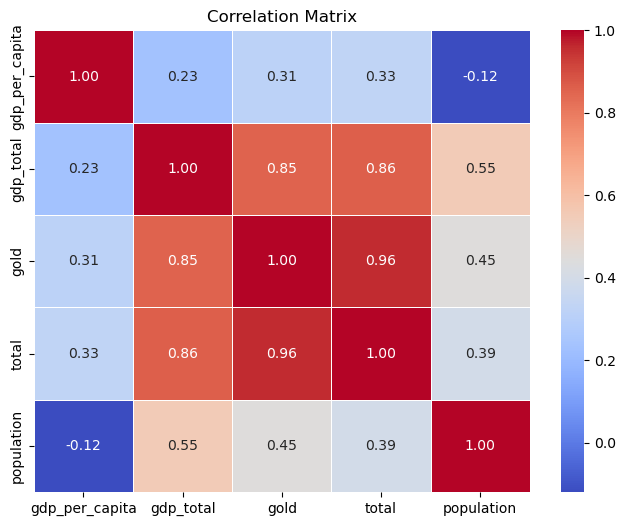

In [80]:
corr_df = gdp_pc_medals.set_index('country')
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Description for chart above:**
- We observe a **0.86** correlative strength between `gdp_total`  and `gold`/`total` medal counts
- This matrix compares features in the `Olympics24` dataset against each other to identify correlative strengths 
- Used to observe relationships between GDP variant metrics and medal counts 


**Description for above chart:**

In [81]:

# gdp_pc_medals = olympics24[['country', 'gdp_per_capita', 'gdp_total', 'total', 'population']]

# # Scatter plot for GDP Total vs Total Medals
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=gdp_pc_medals, x='gdp_total', y='total', hue='country', s=100)
# plt.title('GDP Total vs Total Medals')
# plt.xlabel('GDP Total (USD)')
# plt.ylabel('Total Medals')
# plt.show()

# # Scatter plot for GDP Per Capita vs Total Medals
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=gdp_pc_medals, x='gdp_per_capita', y='total', hue='country', s=100)
# plt.title('GDP Per Capita vs Total Medals')
# plt.xlabel('GDP Per Capita (USD)')
# plt.ylabel('Total Medals')
# plt.show()

# Linear Regression: GDP and Population vs Total Medals
# X = gdp_pc_medals[['gdp_total', 'population']]
# y = gdp_pc_medals['total']

# # Add constant for statsmodels
# X_const = sm.add_constant(X)
# model = sm.OLS(y, X_const).fit()

# # Plot the regression results
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=gdp_pc_medals, x='gdp_total', y='total', s=100, label='GDP vs Medals')
# sns.scatterplot(data=gdp_pc_medals, x='population', y='total', s=100, label='Population vs Medals')
# plt.title('Linear Regression: GDP and Population vs Total Medals')
# plt.xlabel('Explanatory Variables (GDP/Population)')
# plt.ylabel('Total Medals')
# plt.legend()
# plt.show()

In [82]:
gdp_pc_medals['region'] = olympics24['region']
gdp_pc_medals_region = gdp_pc_medals
gdp_pc_medals_region = gdp_pc_medals[['region', 'total', 'gdp_per_capita', 'gdp_total', 'population']]
gdp_scatterplot_region = gdp_pc_medals_region.groupby('region', as_index=False).mean()
gdp_scatterplot_region

/var/folders/t5/1y7x3kc535bctp93r0gt23rm0000gn/T/ipykernel_55898/366769916.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,total,gdp_per_capita,gdp_total,population
0,Africa,3.700000,3682.994000,161.975000,53.080000
1,Asia,11.416667,19892.214167,1406.262500,160.233333
2,Caribbean,2.000000,23621.355000,59.370000,1.650000
3,Europe,14.000000,38062.646333,763.368000,19.130000
4,North America,25.428571,32696.654286,4594.938571,78.057143
5,Oceania,24.666667,39702.586667,659.650000,10.900000
6,South America,5.833333,12173.703333,619.368333,59.583333


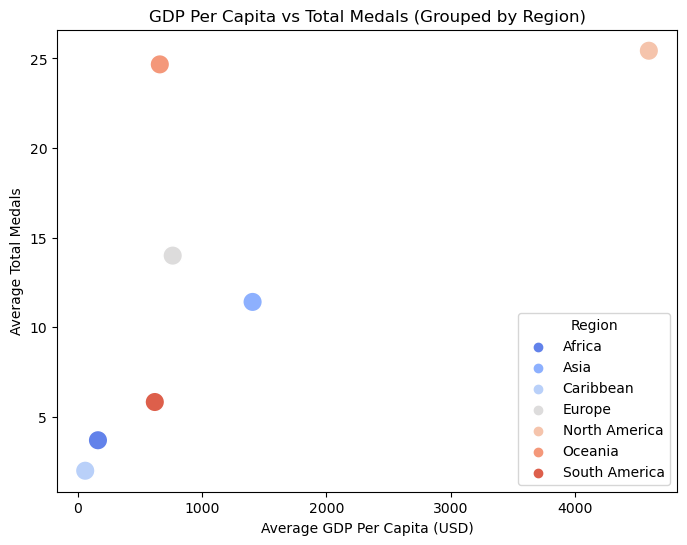

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gdp_scatterplot_region, x='gdp_total', y='total', hue='region', s=200, palette='coolwarm')
plt.title('Total GDP vs Total Medals (Grouped by Region)')
plt.xlabel('Average Total GDP (USD)')
plt.ylabel('Average Total Medals')
plt.legend(title='Region')
plt.show()

**Description for chart above:**
- Compares `regions` average `gdp_total` and their average `total` medal counts 
- the thought process was to observe potential linear trends (which there exists)

**Description for above chart:**

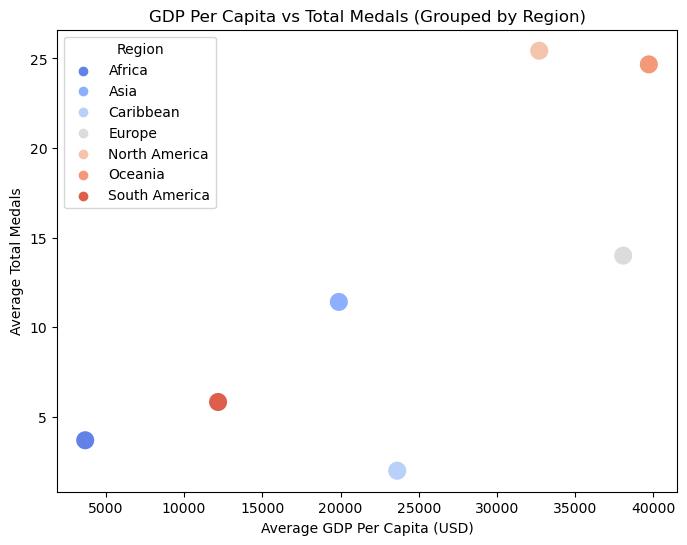

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gdp_scatterplot_region, x='gdp_per_capita', y='total', hue='region', s=200, palette='coolwarm')
plt.title('GDP Per Capita vs Total Medals (Grouped by Region)')
plt.xlabel('Average GDP Per Capita (USD)')
plt.ylabel('Average Total Medals')
plt.legend(title='Region')
plt.show()

**Description for chart above:**
- Compares `regions` average `gdp_per_capita` and their average `total` medal counts 
- the thought process was to observe potential linear trends (which there exists)

**Description for above chart:**



In [104]:
figtree = px.treemap(
    olympics24,
    path=['region', 'country'],  
    values='total',             
    color='total',              
    hover_data=['gold', 'silver', 'bronze'],  
    color_continuous_scale='RdYlGn',
    labels={"total": "Total Medals"}  
)

# Update layout to adjust appearance
figtree.update_layout(
    title="Treemap of Total Olympic Medals by Country",
    title_font_size=20,
    uniformtext=dict(minsize=10, mode='hide'),  
)

# Show the chart
figtree.show()

**Description for chart above:**
- Compares `region`s (continents) and their `total` medal counts 
- gives us insight to the countries that are performing best by looking at the size of squares.
- suggests what nations to notice and be aware of for strong GDP trends in both `gdp_total` and `gdp_per_capita`

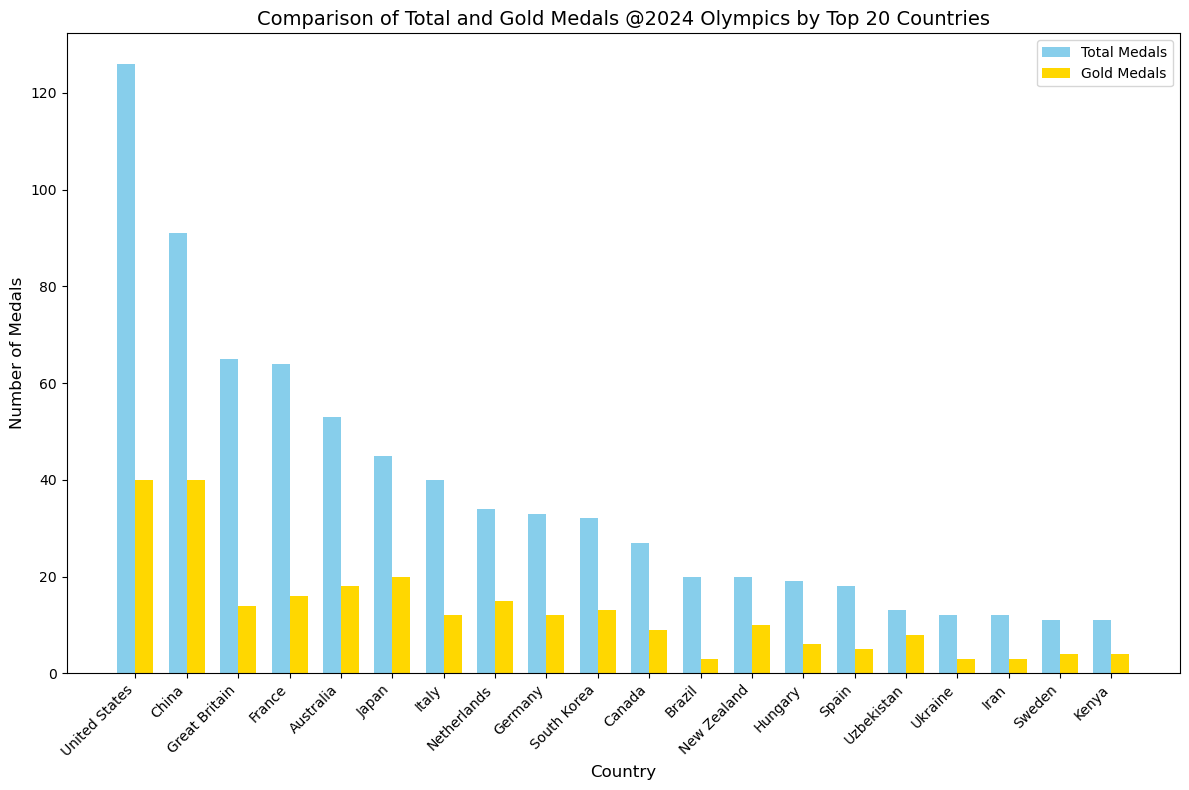

In [93]:
medal_comparison = olympics24[['country', 'total', 'gold']].sort_values(by='total', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(medal_comparison))

# Bars for Total and Gold Medals
plt.bar(index, medal_comparison['total'], bar_width, label='Total Medals', color='skyblue')
plt.bar(index + bar_width, medal_comparison['gold'], bar_width, label='Gold Medals', color='gold')

# Formatting
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.title('Comparison of Total and Gold Medals @2024 Olympics by Top 20 Countries', fontsize=14)
plt.xticks(index + bar_width / 2, medal_comparison['country'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

**Description for chart above:**
- Compares countries and their `total` medal counts alongside their `gold` medal counts 
- the thought process was to visually compare the trends between `medal` counts alongside GDP variants below


In [101]:
gdp_comparison = olympics24[['country', 'gdp_total', 'gdp_per_capita']].sort_values(by='gdp_total', ascending=False).head(20)
gdp_comparison

,country,gdp_total,gdp_per_capita
0,United States,27359.72,81695.19
1,China,17794.65,12614.06
9,Germany,4457.02,52745.76
2,Japan,4212.38,33834.39
70,India,3549.86,2484.85
6,Great Britain,3337.59,48866.60
4,France,3032.23,44460.82
8,Italy,2256.34,38373.17
19,Brazil,2173.44,10043.62
11,Canada,2140.21,53371.70


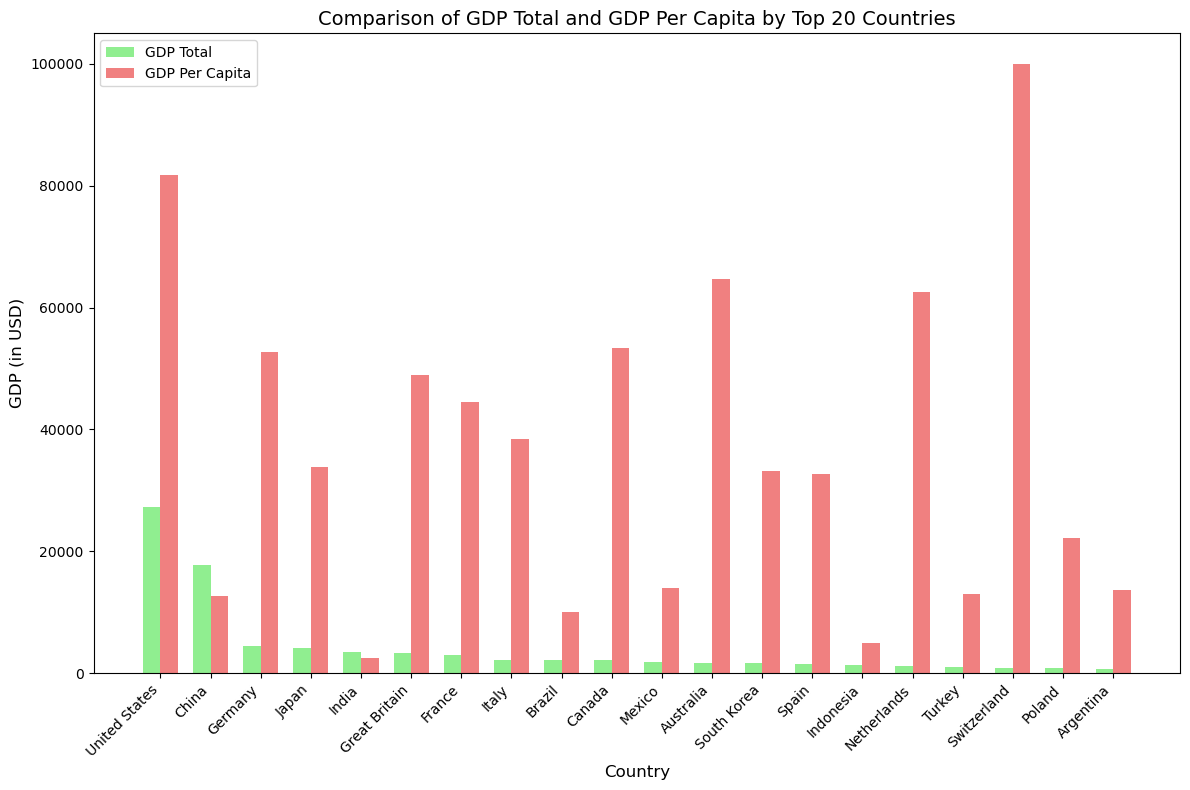

In [102]:
gdp_comparison = olympics24[['country', 'gdp_total', 'gdp_per_capita']].sort_values(by='gdp_total', ascending=False).head(20)


# Plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(gdp_comparison))

# Bars for GDP Total and GDP Per Capita
plt.bar(index, gdp_comparison['gdp_total'], bar_width, label='GDP Total', color='lightgreen')
plt.bar(index + bar_width, gdp_comparison['gdp_per_capita'], bar_width, label='GDP Per Capita', color='lightcoral')

# Formatting
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (in USD)', fontsize=12)
plt.title('Comparison of GDP Total and GDP Per Capita by Top 20 Countries', fontsize=14)
plt.xticks(index + bar_width / 2, gdp_comparison['country'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

**Description for chart above:**
- Compares countries and their GDP per Capita (Thousands USD) alongside Total GDP (Billions measured in Thousands USD)
- the thought process was to visually compare the trends between GDP variants alongside medal performance above



### HISTORICAL OLYMPIC TREND ANALYSIS

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [46]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

With regards to privacy, terms of use and security, the dataset being used is publicly available on Kaggle, and there are no direct privacy issues involving individuals. However, it is important to note that the data is used in accordance with Kaggle's terms of service, and that any findings are not misrepresented or used to make harmful generalizations about certain countries or groups.

There exist potential biases and limitations in the data set present through the exclusion of certain nations from the set. Countries that have not participated in the 2024 Olympics or those that have missing GDPs are excluded from this set; which in turn creates a bias by limiting the analysis to only those countries for which their data is available. As such, this leads to a possibility that the data may be disproportionate or skewed to negatively affect less economically developed nations, as their absence could lead to underestimating their performance potential of nations with fewer economic resources. Moreover, analyzing whether GDP correlates with Olympic medal count implicitly assumes that economic power should or does lead to success in sports. This assumption can marginalize less wealthy nations as GDP alone is not an adequate representation of a country's ability to win medals. There are many other cultural and social factors that play significant roles in this case; which is why it is essential to acknowledge that athletic talent is universal, but opportunities to develop that talent are not. The framing of our findings must be approached with caution, emphasizing that the purpose is to identify patterns rather than to justify disparities between nations. 

Our group will acknowledge the potential biases and limitations in the dataset through the discussion of our results, which ensures that these potential biases are clear to readers. When communicating this analysis, we will be transparent about the notion that correlations observed do not imply causation, and we will emphasize that our analysis is intended to explore patterns rather than make normative claims about countries’ athletic and economic capabilities. Additionally, in order to mitigate these biases we plan to include other factors that influence GDP such as government spending on sports, total investment, etc. so as to gather a more nuanced conclusion with regards to the determinants of Olympic success. Furthermore, throughout the data cleaning and model representation process, we will assess the distribution of countries based on GDP and medals to identify any biases in representation; by evaluating model performance for potential overfitting to high-GDP countries. This is significant to the reporting phase, as we consider how our results create a general conclusion, which will be framed in order to avoid the implication that economic power alone determines success. For instance, while we may observe a correlation between GDP and medal count, it is critical to stress that this does not mean only wealthy countries can succeed in the Olympics. Which in turn dives into the ethical implications of this research question, more specifically how these findings may potentially reflect global inequalities in sports development; by raising awareness of the socioeconomic factors that contribute to Olympic success.

# Team Expectations 


- We all agree to meet virtually via Google Meets, Wednesdays at 4pm to check in with one another and work together.
- We will make decisions through a unanimous vote. If a decision needs to be made in a short time frame and the other members are unresponsive, the individual is free to make a decision. 
- Everyone will be equally doing a bit of leading, communicating, programming and research. Tasks will be assigned during our weekly meetings through discussion. We will track our progress on a timesheet via Google Docs/Sheets.
- We are committed to equally contributing to our project through discussing our roles, ideas and dividing up the work.
- When we are unsure, or have questions or thoughts we will remain in communication with one another via our group chat or individually. 

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |